In [1]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

# pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
def set_font():
    font = {'weight' : 'normal',
            'size'   : 14}
    matplotlib.rc('font', **font)

## Import Data

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
iris_df = DataFrame(iris['data'], columns=iris['feature_names'])

In [13]:
iris_df.iloc[[34, 37]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
34,4.9,3.1,1.5,0.1
37,4.9,3.1,1.5,0.1


The iris dataset is slightly different in R and Python. Two data entries are modified in the next step to keep the data in Python the same as that in R.

In [14]:
iris_df.iloc[37] = Series([4.9, 3.6, 1.4, 0.1], index=iris['feature_names'])
iris_df.iloc[34] = Series([4.9, 3.1, 1.5, 0.2], index=iris['feature_names'])

In [15]:
iris_df.iloc[[34, 37]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
34,4.9,3.1,1.5,0.2
37,4.9,3.6,1.4,0.1


# 1. Linear Models
---
## 1.1.3 Example: Iris Dataset

In [16]:
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']

Coefficient

In [18]:
lin1 = linear_model.LinearRegression()
lin1.fit(np.c_[x], np.c_[y])
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

Mean Square Error

In [19]:
y_pred = iris_df['petal length (cm)']*t1 + t0

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)

In [21]:
DataFrame({'Intercept': Series(t0), 'Coefficient': Series(t1), 'Mean Square Error': mse})

,Coefficient,Intercept,Mean Square Error
0,0.415755,-0.363076,0.042067


In [22]:
# pd.set_option('display.float_format', lambda x: '%.4f' % x)
residuals = y - y_pred
residuals.describe()

count    1.500000e+02
mean    -6.809368e-17
std      2.057903e-01
min     -5.651548e-01
25%     -1.235793e-01
50%     -1.898206e-02
75%      1.328758e-01
max      6.427229e-01
dtype: float64

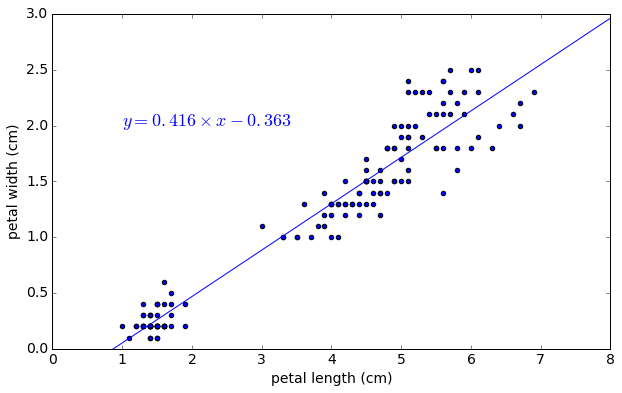

In [23]:
iris_df.plot(kind='scatter',x='petal length (cm)', y='petal width (cm)',figsize=(10,6));
plt.axis([0, 8, 0, 3])
X = np.linspace(0, 8, 1000)
plt.plot(X, X*t1 + t0, 'b')
set_font()

plt.text(1, 2.0, r"$y = 0.416 \times x - 0.363$", fontsize=18, color = "b");

## 1.2.4. Example: Iris Dataset

In [29]:
x = (iris_df['petal length (cm)'], iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
y = iris_df['petal width (cm)']

In [30]:
lin2 = linear_model.LinearRegression()
lin2.fit(np.c_[x], np.c_[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
DataFrame({'name':['(intercept)'] + features,
           'value': [lin2.intercept_[0]] + list(lin2.coef_[0])})

,name,value
0,(intercept),-0.240307
1,petal length (cm),0.524083
2,sepal length (cm),-0.207266
3,sepal width (cm),0.222829


# 2. Regression Diagnositics

In [35]:
y_pred = lin2.predict(np.c_[x])

In [39]:
residuals = y - DataFrame(y_pred, columns=['pred'])['pred']

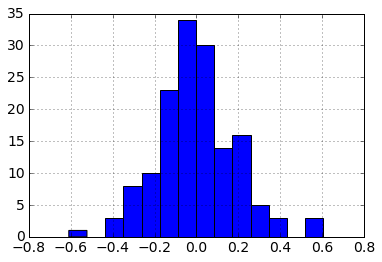

In [41]:
residuals.hist(bins=14)

In [42]:
import pylab 
import scipy.stats as stats

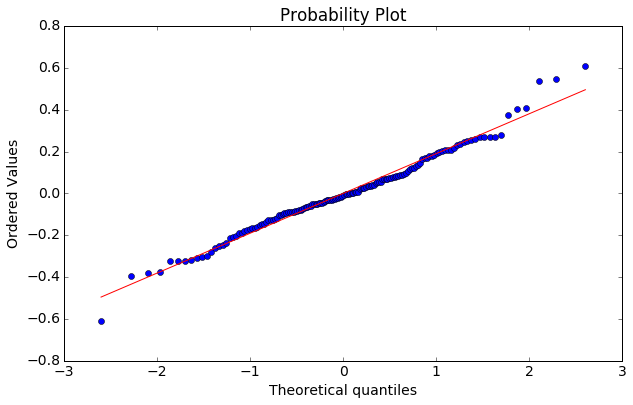

In [43]:
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

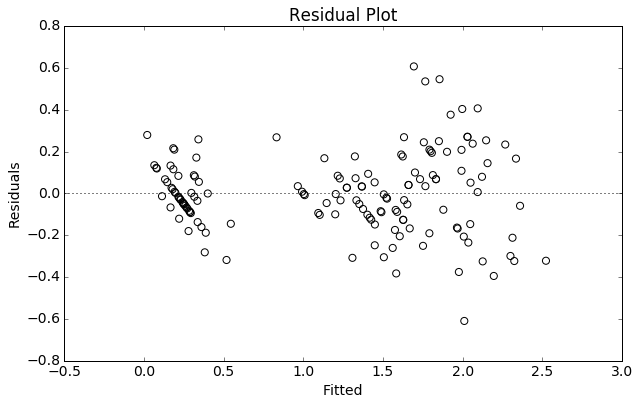

In [45]:
plt.figure(figsize=(10,6));
plt.scatter(y_pred, residuals, s=50, facecolors='none');
plt.xlabel('Fitted');
plt.ylabel('Residuals');
plt.title('Residual Plot');
plt.axhline(0,color='k', linestyle=':');

### Boxcox transformation

In [46]:
from scipy.stats import boxcox
transformed_y, lambda_ = boxcox(y)

In [47]:
lambda_

0.64336907259721177

In [48]:
x = (iris_df['petal length (cm)'], iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
y = iris_df['petal width (cm)']**lambda_

In [49]:
lin_boxcox = linear_model.LinearRegression()
lin_boxcox.fit(np.c_[x], np.c_[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
DataFrame({'name':['(intercept)'] + features,
           'value': [t0] + list(lin_boxcox.coef_[0])})

,name,value
0,(intercept),-0.363076
1,petal length (cm),0.336237
2,sepal length (cm),-0.123174
3,sepal width (cm),0.077864


In [54]:
y_pred = lin_boxcox.predict(np.c_[x])

In [55]:
residuals = y - DataFrame(y_pred, columns=['pred'])['pred']

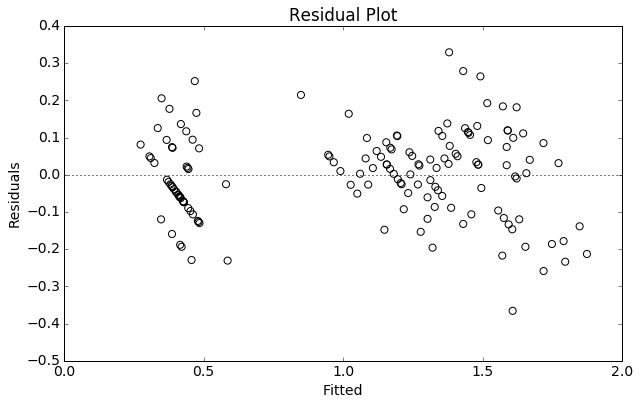

In [56]:
plt.figure(figsize=(10,6));
plt.scatter(y_pred, residuals, facecolors='none',s=50);
plt.xlabel('Fitted');
plt.ylabel('Residuals');
plt.title('Residual Plot');
plt.axhline(0,color='k', linestyle=':')

# 3. Variable Selection
---

In [57]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
iris_df['SL2'] = iris_df['sepal length (cm)']**2
iris_df['SW2'] = iris_df['sepal width (cm)']**2
iris_df['PL2'] = iris_df['petal length (cm)']**2
iris_df['PW2'] = iris_df['petal width (cm)']**2

In [59]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SL2,SW2,PL2,PW2
0,5.1,3.5,1.4,0.2,26.01,12.25,1.96,0.04
1,4.9,3.0,1.4,0.2,24.01,9.00,1.96,0.04
2,4.7,3.2,1.3,0.2,22.09,10.24,1.69,0.04
3,4.6,3.1,1.5,0.2,21.16,9.61,2.25,0.04
4,5.0,3.6,1.4,0.2,25.00,12.96,1.96,0.04


In [60]:
x = iris_df[['petal length (cm)', 'sepal length (cm)', 'sepal width (cm)', 'SL2', 'SW2', 'PL2']]
y = iris_df['petal width (cm)']

In [61]:
from sklearn.svm import SVR
estimator = SVR(kernel="linear")

In [62]:
x.head()

,petal length (cm),sepal length (cm),sepal width (cm),SL2,SW2,PL2
0,1.4,5.1,3.5,26.01,12.25,1.96
1,1.4,4.9,3.0,24.01,9.00,1.96
2,1.3,4.7,3.2,22.09,10.24,1.69
3,1.5,4.6,3.1,21.16,9.61,2.25
4,1.4,5.0,3.6,25.00,12.96,1.96


In [63]:
model =  linear_model.LinearRegression()

In [64]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 5)

In [66]:
Features = DataFrame(columns=x.columns)

In [67]:
Features_selected = DataFrame(columns=x.columns)
Features_ranking = DataFrame(columns=x.columns)
for i in range(1, x.shape[1]+1):
    rfe = RFE(model, i)
    fit = rfe.fit(x, y)
    print("Num Features: %d") % fit.n_features_
    print 'Features: ', np.dot(fit.support_, Series(x.columns) + '; ')
    print '---------------'
    
    selected = DataFrame(fit.support_, index=x.columns, 
                    columns=[str(i)]).transpose()
    ranking = DataFrame(fit.ranking_, index=x.columns,
                       columns=[str(i)]).transpose()
    Features_selected = Features_selected.append(selected)
    Features_ranking = Features_ranking.append(ranking)

Num Features: 1
Features:  petal length (cm); 
---------------
Num Features: 2
Features:  petal length (cm); sepal width (cm); 
---------------
Num Features: 3
Features:  petal length (cm); sepal length (cm); sepal width (cm); 
---------------
Num Features: 4
Features:  petal length (cm); sepal length (cm); sepal width (cm); SW2; 
---------------
Num Features: 5
Features:  petal length (cm); sepal length (cm); sepal width (cm); SL2; SW2; 
---------------
Num Features: 6
Features:  petal length (cm); sepal length (cm); sepal width (cm); SL2; SW2; PL2; 
---------------


In [68]:
Features_selected.index.name= 'Features #'
Features_ranking.index.name= 'Features #'

In [69]:
Features_selected

,petal length (cm),sepal length (cm),sepal width (cm),SL2,SW2,PL2
Features #,,,,,,
1,True,False,False,False,False,False
2,True,False,True,False,False,False
3,True,True,True,False,False,False
4,True,True,True,False,True,False
5,True,True,True,True,True,False
6,True,True,True,True,True,True


In [70]:
Features_ranking

,petal length (cm),sepal length (cm),sepal width (cm),SL2,SW2,PL2
Features #,,,,,,
1,1.0,3.0,2.0,5.0,4.0,6.0
2,1.0,2.0,1.0,4.0,3.0,5.0
3,1.0,1.0,1.0,3.0,2.0,4.0
4,1.0,1.0,1.0,2.0,1.0,3.0
5,1.0,1.0,1.0,1.0,1.0,2.0
6,1.0,1.0,1.0,1.0,1.0,1.0
